# Chapter 4 - Sampling and Inferential Statistics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

import matplotlib.ticker as mticker

In [3]:
df = pd.read_excel("PopulationEstimates.xls", skiprows=2)  # Read Excel file, skipping the first two rows
dfTX = df[df["State"] == "TX"].tail(-1)                    # Filter rows for Texas, excluding the first row

dfTX.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2568,48001,TX,Anderson County,5.0,7.0,8.0,8.0,4.0,58458,58459,...,11.471813,-1.616940,-0.855498,-4.722692,-0.810052,-0.051802,-2.839950,-0.729192,12.266547,-0.808470
2569,48003,TX,Andrews County,6.0,6.0,5.0,5.0,2.0,14786,14786,...,-20.882718,18.512822,26.126931,34.856036,27.658734,26.231998,23.474443,-26.025412,-19.189525,20.246651
2570,48005,TX,Angelina County,5.0,5.0,8.0,8.0,0.0,86771,86771,...,-4.194449,-10.057036,0.126292,-2.173727,-5.433135,-0.937507,-0.182364,-4.771313,-3.578959,-9.381990
2571,48007,TX,Aransas County,2.0,2.0,2.0,2.0,5.0,23158,23158,...,12.717722,-62.267715,5.388396,14.055838,22.641350,28.724721,14.781816,18.797744,12.836210,-62.145860
2572,48009,TX,Archer County,3.0,3.0,2.0,2.0,2.0,9054,9055,...,2.390983,-0.341452,-31.984843,-2.493907,-0.113611,6.578947,-11.253197,4.219409,2.504839,-0.227635


In [4]:
dfTX.tail()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2817,48499,TX,Wood County,6.0,6.0,6.0,6.0,0.0,41964,41959,...,16.899297,23.976739,5.828199,11.505682,4.626024,14.167401,12.643638,19.314219,16.853869,23.954373
2818,48501,TX,Yoakum County,7.0,7.0,9.0,9.0,2.0,7879,7879,...,-27.769709,-14.574710,6.825507,2.744853,8.597396,9.140108,15.716631,-12.370657,-22.424911,-8.744826
2819,48503,TX,Young County,6.0,7.0,6.0,11.0,2.0,18550,18550,...,-5.376493,4.052966,-8.027119,-3.057520,4.039742,-0.764276,-4.335538,-1.543976,-4.267938,5.163368
2820,48505,TX,Zapata County,6.0,6.0,6.0,5.0,2.0,14018,14018,...,-21.364696,-16.015172,-6.639356,-9.679456,-5.786392,-14.024369,-7.677676,-15.949184,-21.782247,-16.366382
2821,48507,TX,Zavala County,7.0,7.0,9.0,9.0,0.0,11677,11677,...,-21.999004,-9.604142,1.525036,2.928870,5.035288,-4.659528,-2.847728,-21.841384,-18.346339,-4.092200


# The Safer Sampling Ways
## Simple Random Sampling (SRS)

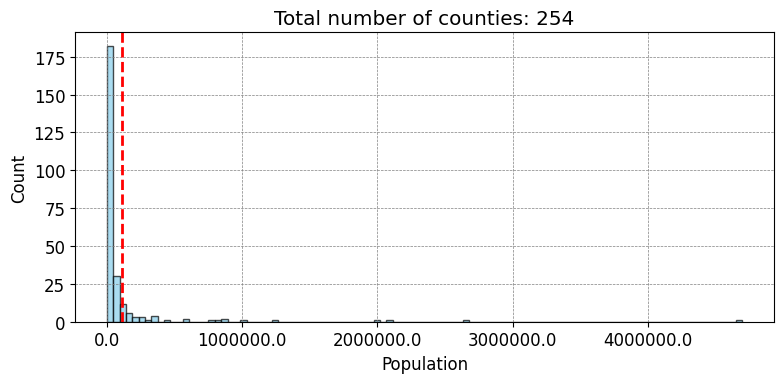

In [6]:
# Total number of counties

plt.figure(figsize=(8, 4))             # Set figure size
plt.rcParams.update({'font.size': 12})  # Update font size for labels and title

# Plot a histogram for 2018 population estimates
plt.hist(dfTX["POP_ESTIMATE_2018"], bins=100, color='skyblue', edgecolor='black', alpha=0.7)  

# Add a title showing the total number of counties
plt.title(f"Total number of counties: {len(dfTX['POP_ESTIMATE_2018'])}")  

# Add a red dashed line for the mean population estimate
plt.axvline(np.mean(dfTX["POP_ESTIMATE_2018"]), color="red", linestyle="--", linewidth=2)  

plt.xlabel("Population")                                             # Set x-axis label
plt.ylabel("Count")                                                  # Set y-axis label
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid lines for clarity


plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x}"))  # Format x-axis as decimal

plt.tight_layout()                                                   # Adjust layout to prevent overlap
plt.show()                                                           # Display the plot

In [7]:
# The average population of a county

np.mean(dfTX["POP_ESTIMATE_2018"]).round(2)

112999.39

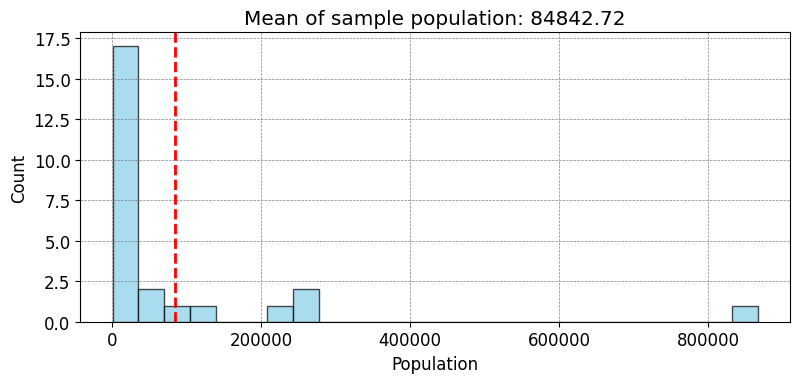

In [8]:
random.seed(2020)            # Set the random seed for reproducibility
plt.figure(figsize=(8, 4))  # Set figure size

# Select a random sample of 25 population estimates
sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(), 25)

# Plot a histogram for the sample population estimates
plt.hist(sample, bins=25, color='skyblue', edgecolor='black', alpha=0.7)  

# Add a red line indicating the mean of the sample
plt.axvline(np.mean(sample), color="red", linestyle="--", linewidth=2)  

# Add a title showing the mean of the sample population
plt.title(f"Mean of sample population: {np.mean(sample):.2f}")  

plt.xlabel("Population")                                             # Set x-axis label
plt.ylabel("Count")                                                  # Set y-axis label
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid lines for clarity
plt.tight_layout()   # Adjust layout to prevent overlap
plt.show()           # Display the plot

The following code snippet calculates the mean of the sample 100 times and visualizes the distribution of the sampled mean. The following code snippet repeats the SRS process 100 times and calculates the mean for each repetition. Then, plot the histogram of the means. I call the number of occasions(100) trials, and the size of each sample (25) numSample: 

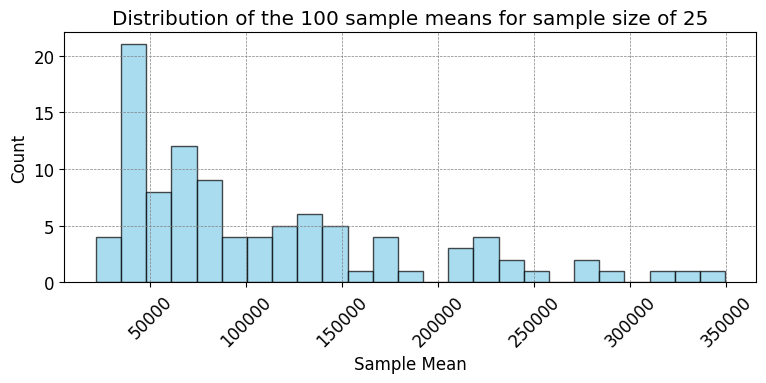

In [10]:
# Distribution of Sample Mean

numSample = 25     # Define the sample size
trials = 100       # Define the number of trials
random.seed(2020)  # Set the random seed for reproducibility

sampleMeans = []   # Initialize a list to store sample means

# Perform the trials to calculate sample means
for i in range(trials):
    # Randomly sample 'numSample' elements and calculate the mean
    sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(), numSample)
    sampleMeans.append(np.mean(sample))

plt.figure(figsize=(8, 4))  # Set figure size

# Plot the histogram of sample means
plt.hist(sampleMeans, bins=25, color='skyblue', edgecolor='black', alpha=0.7)

# Add a title with the number of trials and sample size
plt.title(f"Distribution of the {trials} sample means for sample size of {numSample}")

plt.gca().xaxis.set_tick_params(rotation=45)                         # Rotate x-axis labels for better readability
plt.xlabel("Sample Mean")                                            # Set x-axis label
plt.ylabel("Count")                                                  # Set y-axis label
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid lines for clarity
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display the plot

However, the distribution shape will change drastically if you modify the sample size or
number of trials. Let me first demonstrate the change in sample size. In the following code
snippet, the number of samples takes values of 25 and 100 and the number of trials is
1000. Note that the distribution is normed, so the scale becomes comparable:

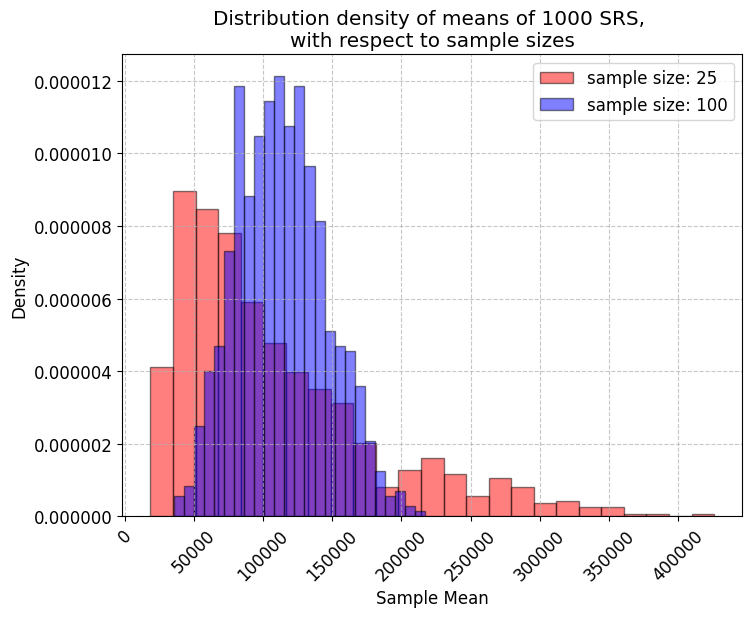

In [12]:
import matplotlib.ticker as mticker 

# Change of sample size

numSamples = [25, 100]      # Two sample sizes
colors = ["r", "b"]         # Red and blue for sample sizes
trials = 1000               # Number of trials per sample size
random.seed(2020)           # Fix seed for consistent random sampling

plt.figure(figsize=(8, 6))  # Set plot size

# Loop through the defined sample sizes
for j in range(len(numSamples)):
    
    sampleMeans = []        # Reset sample means for each sample size
    
    for i in range(trials): # Perform trials for each sample size
        
        sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(), numSamples[j]) # Draw a random sample from the population column
        sampleMeans.append(np.mean(sample))                                        # Compute the mean of the sample and store it
        
    # Plot histogram of the sample means
    plt.hist(
        sampleMeans,                            # Data for histogram
        color=colors[j],                        # Color for current sample size
        alpha=0.5,                              # Transparency for overlap clarity
        bins=25,                                # Number of bins
        label=f"sample size: {numSamples[j]}",  # Legend label
        edgecolor='black',                      # Create a black edge
        density=True                            # Normalize to density
    )

# Add legend to differentiate sample sizes
plt.legend()

# Rotate x-axis ticks for better readability
plt.gca().xaxis.set_tick_params(rotation=45)

# Add title and axis labels
plt.title("Distribution density of means of 1000 SRS, \nwith respect to sample sizes")  # Plot title
plt.xlabel("Sample Mean")  # X-axis label
plt.ylabel("Density")      # Y-axis label

# Add a grid for better visual alignment
plt.grid(True, linestyle='--', alpha=0.7)  # Add dashed gridlines with slight transparency

# Set the y-axis formatter to avoid scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:.6f}"))  # Format y-axis as decimal

# Show the plot
plt.show()

In short, if you choose a bigger sample size, it is more likely that you will obtain a larger
estimation of the mean of the population data. It is not counter-intuitive because the
mean is very susceptible to extreme values. With a larger sample size, the extreme values,
those > 1 million, are more likely to be selected and therefore increase the chance that the
sample mean is large.

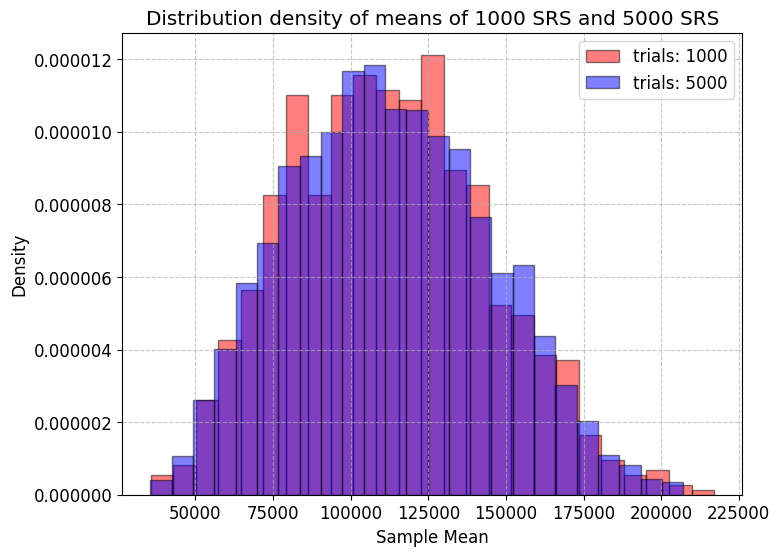

In [14]:
# Change of trials

numSample = 100                 # Fixed sample size
colors = ["r", "b"]             # Colors for the histograms
trials = [1000, 5000]           # Number of trials for each case
random.seed(2020)               # Fix seed for consistent random sampling

plt.figure(figsize=(8, 6))      # Set plot size

# Loop through the defined trial counts
for j in range(len(trials)):
    sampleMeans = []            # Reset sample means for each trial count
    
    for i in range(trials[j]):  # Perform trials for each setting
        # Draw a random sample from the population column
        sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(), numSample)
        # Compute the mean of the sample and store it
        sampleMeans.append(np.mean(sample))
        
    # Plot histogram of the sample means
    plt.hist(
        sampleMeans,                      # Data for histogram
        color=colors[j],                  # Color for current trial count
        alpha=0.5,                        # Transparency for overlap clarity
        bins=25,                          # Number of bins
        label=f"trials: {trials[j]}",     # Legend label
        edgecolor='black',                # Create a black edge
        density=True                      # Normalize to density
    )

# Add legend to differentiate trial counts
plt.legend()

# Add title and axis labels
plt.title("Distribution density of means of 1000 SRS and 5000 SRS")  # Plot title
plt.xlabel("Sample Mean")                                            # X-axis label
plt.ylabel("Density")                                                # Y-axis label

# Add a grid for better visual alignment
plt.grid(True, linestyle='--', alpha=0.7)                            # Add dashed gridlines with slight transparency

# Set the y-axis formatter to avoid scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:.6f}"))  # Format y-axis as decimal

# Show the plot
plt.show()

# Stratified Random Sampling

Stratifying is a process of aligning or arranging something into categories or groups.
In stratified random sampling, you should first classify or group the population into
categories and then select elements from each group randomly.

For the Texas county population data, we want to include all counties from different
urbanization levels. The following code snippet examines the urbanization code
level distribution:

In [17]:
from collections import Counter

# Count occurrences of unique values in the specified column
rural_urban_counts = Counter(dfTX["Rural-urban_Continuum Code_2013"])  # Count unique values in the column

# Display the counts
print(rural_urban_counts)                                              # Print the count of each unique value

Counter({6.0: 65, 7.0: 39, 1.0: 35, 9.0: 29, 2.0: 25, 3.0: 22, 8.0: 20, 4.0: 13, 5.0: 6})


This code will pick exactly 4 elements from each unique group in the `Rural-urban_Continuum Code_2013` column, regardless of how many unique groups exist.

In [19]:
random.seed(2020)          # Fix seed for reproducibility
sampleMeans = []           # Initialize list to store means of sampled data
trial = 1                  # Number of trials
samples = []               # Initialize list to collect samples

# Loop through trials
for i in range(trial):  
    for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):  
        
        # Iterate over unique levels in the specified column, sorted for consistency
        samples += random.sample(  
            dfTX[dfTX["Rural-urban_Continuum Code_2013"] == level]["POP_ESTIMATE_2018"].to_list(),  # Filter by level and convert to list
            4  # Sample 4 elements for each level
        )
    sampleMeans.append(np.mean(samples).round(2))  # Compute and store mean of all collected samples

sampleMeans

[144010.47]

The number 144010.47222222222 is the average (mean) of all the population estimates sampled across all groups in this single trial. The brackets indicate that it's stored as an element of the sampleMeans list, which allows for collecting multiple means if there were more trials.

In [21]:
random.seed(2020)          # Fix seed for reproducibility
sampleMeans = []           # Initialize list to store means of sampled data
trial = 3                  # Number of trials
samples = []               # Initialize list to collect samples

# Loop through trials
for i in range(trial):  
    for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):  
        
        # Iterate over unique levels in the specified column, sorted for consistency
        samples += random.sample(  
            dfTX[dfTX["Rural-urban_Continuum Code_2013"] == level]["POP_ESTIMATE_2018"].to_list(),  # Filter by level and convert to list
            4  # Sample 4 elements for each level
        )
    sampleMeans.append(np.mean(samples).round(2))  # Compute and store mean of all collected samples

sampleMeans

[144010.47, 132694.42, 120722.89]

Thefollowing code snippet performs stratified random sampling 1,000 times and plots the distribution of means:

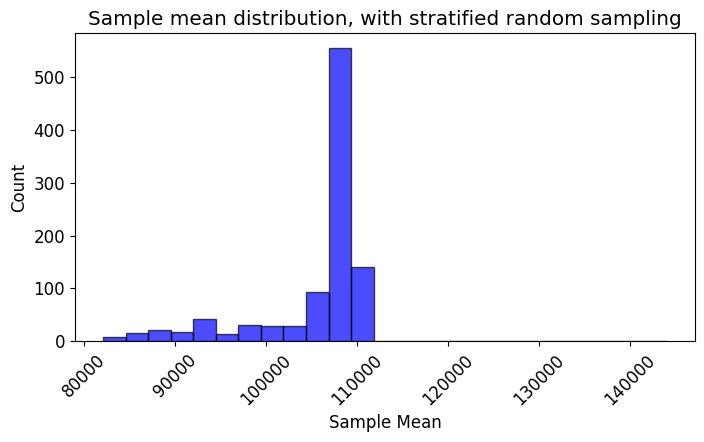

In [23]:
random.seed(2020)          # Fix seed for reproducibility
sampleMeans = []           # Initialize list to store means of sampled data
trial = 1000               # Number of trials
samples = []               # Initialize list to collect samples

# Loop through trials
for i in range(trial):  
    for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):  
        
        # Iterate over unique levels in the specified column, sorted for consistency
        samples += random.sample(  
            dfTX[dfTX["Rural-urban_Continuum Code_2013"] == level]["POP_ESTIMATE_2018"].to_list(),  # Filter by level and convert to list
            4  # Sample 4 elements for each level
        )
    sampleMeans.append(np.mean(samples).round(2))  # Compute and store mean of all collected samples

#==============================================================================================================================================#

# Set the figure size for the plot
plt.figure(figsize=(8, 4))  # Create a 10x8 inch figure

# Plot a histogram of the sample means
plt.hist(
    sampleMeans,       # Data: list of sample means
    bins=25,           # Number of bins in the histogram
    color='blue',      # Optional: set color for the bars
    edgecolor='black', # Create a black edge
    alpha=0.7          # Optional: transparency for clarity
)

plt.title("Sample mean distribution, with stratified random sampling")  # Title describing the visualization
plt.gca().xaxis.set_tick_params(rotation=45)  # Rotate labels 45 degrees
plt.xlabel("Sample Mean")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.show()  # Render the histogram

Check the mean of each group

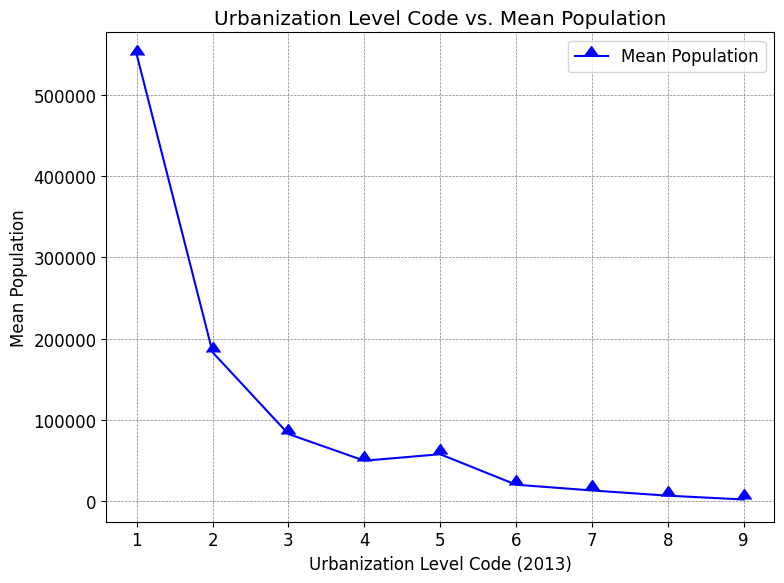

In [25]:
plt.figure(figsize=(8, 6))  # Set the figure size

levels = []     # Initialize a list to store urbanization levels
codeMeans = []  # Initialize a list to store mean population for each level

# Iterate through each unique level of urbanization, sorted in ascending order
for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):
    
    # Calculate the mean population estimate for the current level
    codeMean = np.mean(dfTX[dfTX["Rural-urban_Continuum Code_2013"] == level]["POP_ESTIMATE_2018"])
    levels.append(level)        # Add the level to the list
    codeMeans.append(codeMean)  # Add the mean population to the list

# Plot urbanization levels against mean population with markers
plt.plot(levels, codeMeans, marker=10, markersize=10, color='blue', label='Mean Population')

plt.title("Urbanization Level Code vs. Mean Population")             # Set the title of the plot
plt.xlabel("Urbanization Level Code (2013)")                         # Label for the x-axis
plt.ylabel("Mean Population")                                        # Label for the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid lines for clarity
plt.legend()                                                         # Add a legend for better interpretation
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display the plot

Note that the larger the urbanization level code, the smaller the mean population.
Stratified random sampling takes samples from each group, so an improved performance
is not surprising.

# Systematic Random Sampling

The following code snippet takes every tenth of the Texas dataset and calculates the mean:

In [29]:
random.seed(2020)                     # Set the random seed for reproducibility

idx = random.randint(0, 10)           # Select a random starting index between 0 and 10

populations = dfTX["POP_ESTIMATE_2018"].to_list()  # Convert the population column to a list

samples = []                          # Initialize a list to store the sampled populations
samples.append(populations[idx])      # Append the initial random population sample

# Continue sampling every 10th entry until the index exceeds the list length
while idx + 10 < len(populations):
    idx += 10                         # Move the index forward by 10
    samples.append(populations[idx])  # Append the sampled population to the list

print(np.mean(samples))               # Calculate and print the mean of the sampled populations

158799.64


# Sampling Distribution of Statistics
### Theoretical mean and standard deviation

In [31]:
# Calculate and print the mean of numbers from 1 to 10
print(np.mean([i for i in range(1, 11)]))

# Calculate and print the standard deviation of numbers from 1 to 10
print(np.sqrt(np.mean([(i - 5.5)**2 for i in range(1, 11)]))) 

5.5
2.8722813232690143


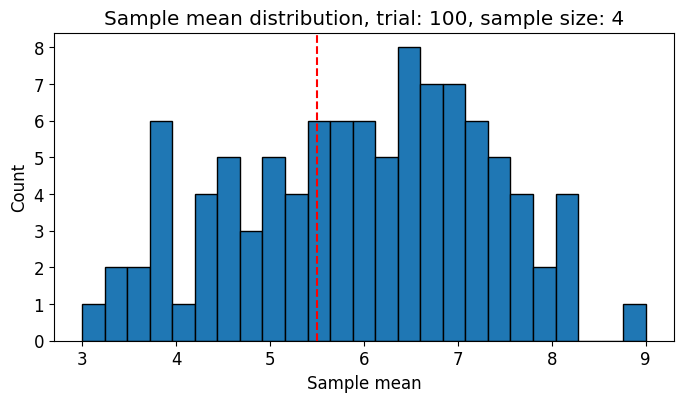

In [32]:
trials = 100       # Number of trials to generate sample means
sampleSize = 4     # Size of each sample
random.seed(2020)  # Set a fixed random seed for reproducibility
sampleMeans = []   # Initialize a list to store sample means

# Define the population from which samples will be drawn
candidates = [i for i in range(1, 11)]  

# Update font size for plot labels and title
plt.rcParams.update({'font.size': 12})  

# Perform sampling and calculate sample means
for i in range(trials):  
    # Generate a sample and compute its mean
    sampleMean = np.mean([random.choice(candidates) for _ in range(sampleSize)])  
    sampleMeans.append(sampleMean)  # Append the mean to the list

# Create a histogram of sample means
plt.figure(figsize=(8, 4))                         # Set the figure size
plt.hist(sampleMeans, edgecolor='black', bins=25)  # Plot histogram with 25 bins and black edges
plt.axvline(5.5, c="r", linestyle="--")            # Add a red dashed line at the population mean (5.5)

# Set the plot title and axis labels
plt.title("Sample mean distribution, trial: {}, sample size: {}".format(trials, sampleSize))  
plt.xlabel("Sample mean")  
plt.ylabel("Count")  
plt.show()  # Display the plot

In [33]:
# Sample means' standard deviation:
np.mean(sampleMeans)

5.9575

5.5 is the population mean ("true" mean), 5.9575 is the sample mean.

### Increase the Number of Samples

trials: 400, mean: 5.64, std: 1.41
trials: 1600, mean: 5.53, std: 1.46
trials: 6400, mean: 5.49, std: 1.43
trials: 10000, mean: 5.51, std: 1.45



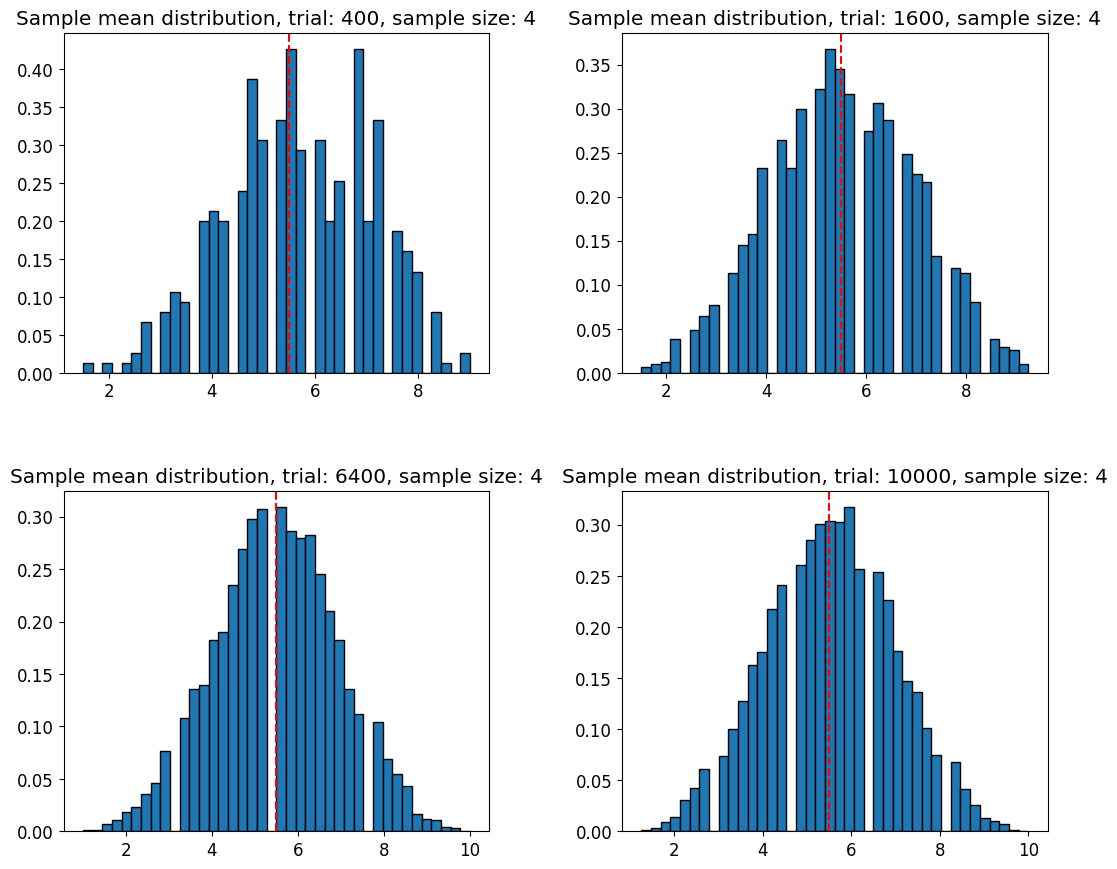

In [36]:
# Function to calculate sample means for given trials and sample size
def obtainSampleMeans(trials=100, sampleSize=4):
    sampleMeans = []
    candidates = [i for i in range(1, 11)]
    for i in range(trials):
        sampleMean = np.mean([random.choice(candidates) for _ in range(sampleSize)])
        sampleMeans.append(sampleMean)
    return sampleMeans

random.seed(2020)                                    # Set the random seed for reproducibility

# Create subplots with 2 rows and 2 columns
figure, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust figure size for better layout
figure.tight_layout(pad=5.0)                         # Add padding to prevent overlap between subplots

# Define the trials multiplier for each graph
times = [4, 16, 64, 100]

# Loop through the times to generate and plot histograms
for i in range(len(times)):
    
    # Generate sample means for the current trial and sample size
    sampleMeans = obtainSampleMeans(100 * times[i], 4)
    
    # Select the appropriate subplot axis
    ax = axes[i // 2, i % 2]
    
    # Plot the histogram of sample means
    ax.hist(sampleMeans, edgecolor='black', bins=40, density=True)
    ax.axvline(5.5, c="r", linestyle="--")  # Add a red dashed line at the population mean (5.5)
    
    # Set the title for the current plot
    ax.set_title("Sample mean distribution, trial: {}, sample size: {}".format(100 * times[i], 4))
    
    # Print mean and standard deviation for each trial
    print("trials: {}, mean: {:.2f}, std: {:.2f}".format(times[i] * 100, np.mean(sampleMeans), np.std(sampleMeans)))

print()

# Display the plots
plt.show()

### Increase Sample Sizes

Sample size: 2, mean: 5.52, std: 2.01
Sample size: 4, mean: 5.50, std: 1.44
Sample size: 8, mean: 5.51, std: 1.03
Sample size: 16, mean: 5.50, std: 0.72
Sample size: 32, mean: 5.49, std: 0.51
Sample size: 64, mean: 5.50, std: 0.37
Sample size: 128, mean: 5.50, std: 0.25
Sample size: 256, mean: 5.50, std: 0.18



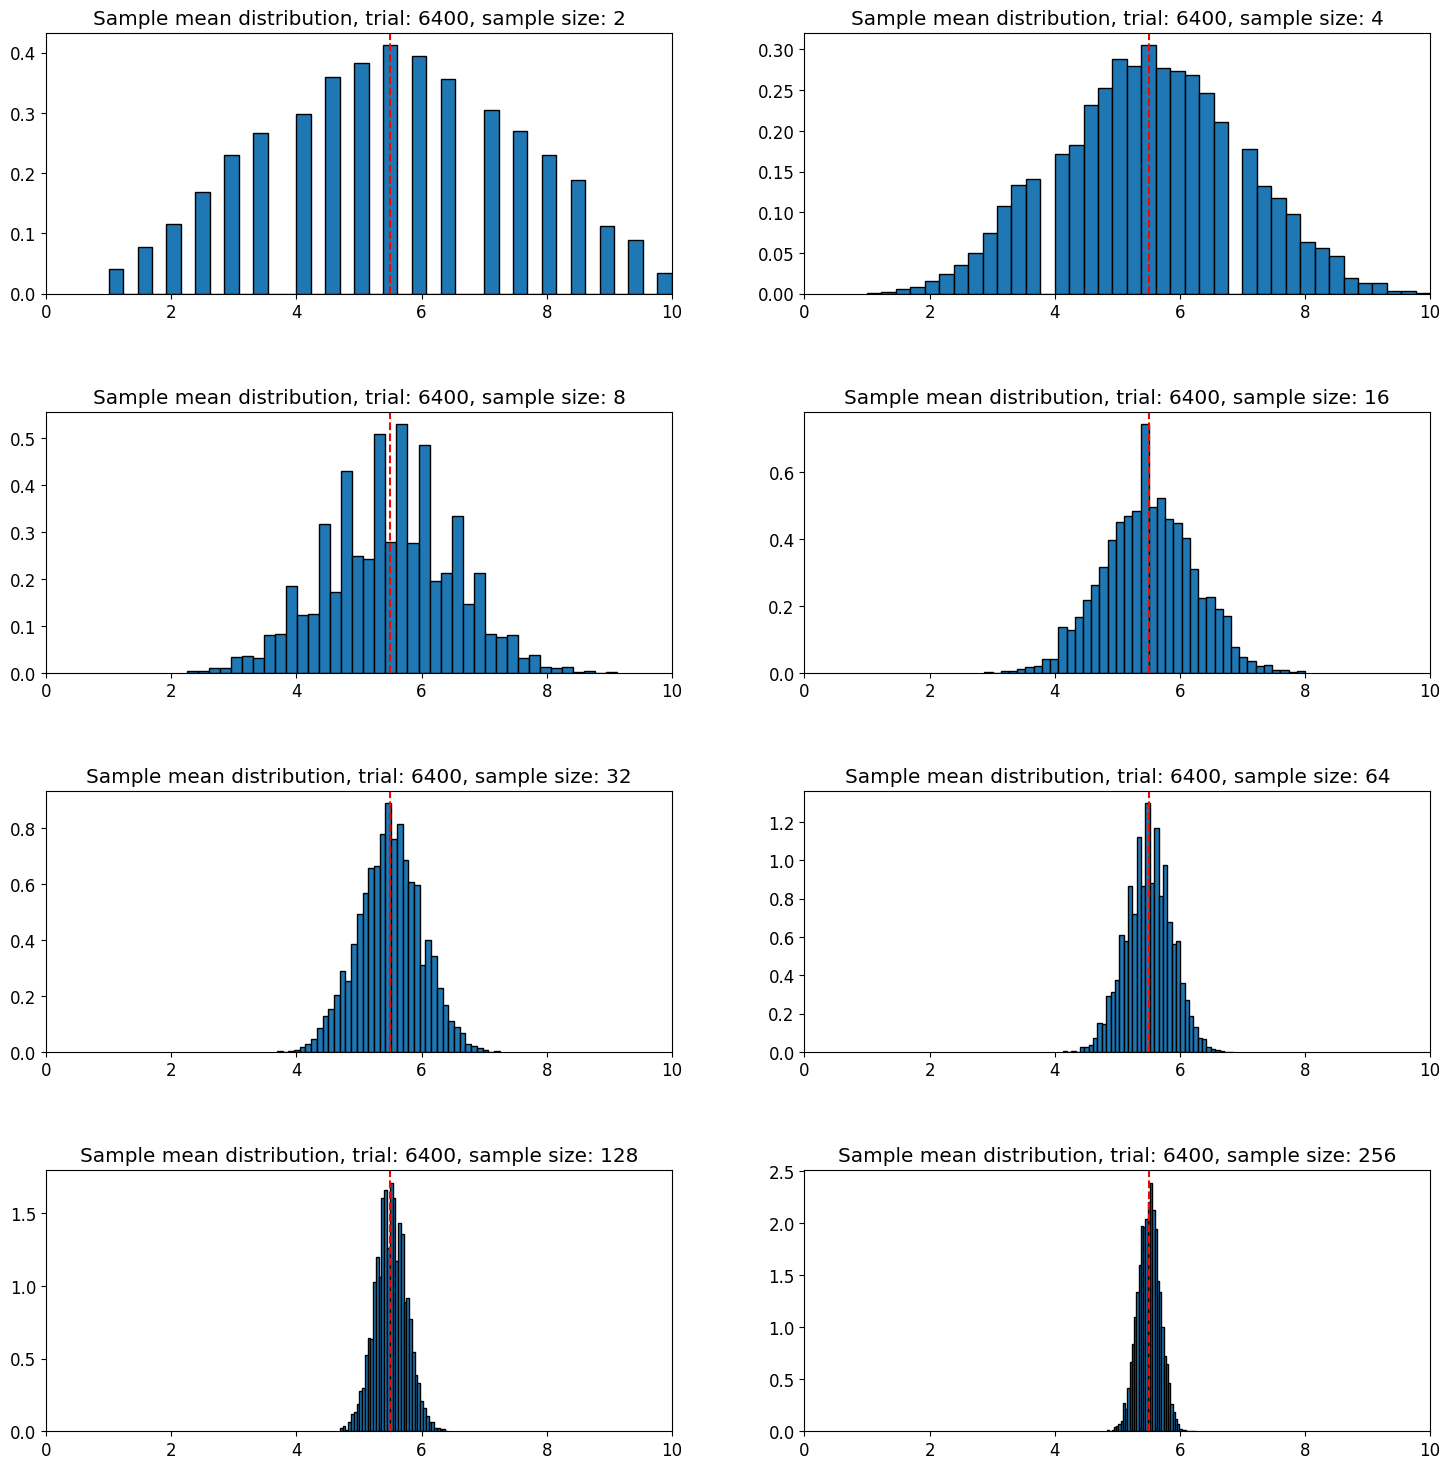

In [38]:
# Set the random seed for reproducibility
random.seed(2020)

# Define sample sizes as powers of 2
sizes = [2**k for k in range(1, 9)]

# Create subplots with 2 columns and 4 rows
figure, axes = plt.subplots(4, 2, figsize=(16, 16))  # Adjust the figure size for better spacing
figure.tight_layout(pad=5.0)  # Add padding to prevent overlap between subplots

# Loop through the sample sizes and plot histograms
for i in range(len(sizes)):
    # Generate sample means for each sample size
    sampleMeans = obtainSampleMeans(6400, sizes[i])
    
    # Select the appropriate subplot axis
    ax = axes[i // 2, i % 2]  
    
    # Plot histogram of sample means
    ax.hist(sampleMeans, edgecolor='black', bins=np.linspace(np.min(sampleMeans), np.max(sampleMeans), 40), density=True)
    ax.axvline(5.5, c="r", linestyle="--")  # Add a red dashed line at the population mean (5.5)
    
    # Set titles and labels
    ax.set_title("Sample mean distribution, trial: {}, sample size: {}".format(6400, sizes[i]))
    ax.set_xlim(0, 10)  # Set consistent x-axis limits for all plots

    # Print mean and standard deviation for each sample size
    print("Sample size: {}, mean: {:.2f}, std: {:.2f}".format(sizes[i], np.mean(sampleMeans), np.std(sampleMeans)))
    
print()

# Display the plots
plt.show()

### Standard Error of the Sample Mean

In [40]:
random.seed(2020)                    # Set the random seed for reproducibility
sizes = [2**k for k in range(1, 9)]  # Generate sample sizes as powers of 2 (2, 4, 8, ..., 256)
ses = []                             # Initialize an empty list to store the standard errors

for i in range(len(sizes)):  # Iterate through each sample size
    sampleMeans = obtainSampleMeans(6400, sizes[i])  # Calculate sample means for 6400 trials with the current sample size
    ses.append(np.std(sampleMeans))                  # Append the standard deviation of sample means to the 'ses' list

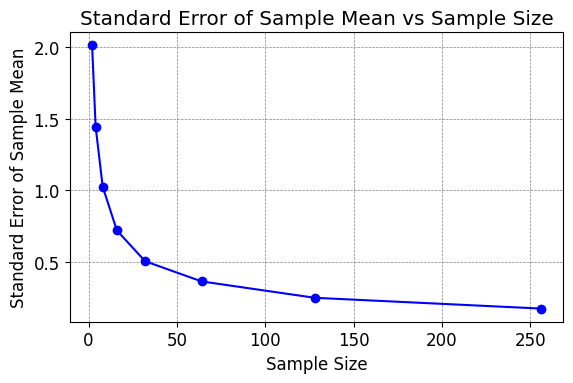

In [41]:
plt.figure(figsize=(6, 4))  # Set the figure size

# Plot standard errors (ses) against sample sizes
plt.plot(sizes, ses, marker='o', linestyle='-', color='b')  # Add markers and a line for clarity

# Set the title and axis labels with descriptive text
plt.title("Standard Error of Sample Mean vs Sample Size")   # Title to describe the plot
plt.xlabel("Sample Size")                                   # Label for the x-axis (sample sizes)
plt.ylabel("Standard Error of Sample Mean")                 # Label for the y-axis (standard errors)

# Add grid lines for improved readability
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')  

plt.tight_layout()  # Adjust the layout
plt.show()          # Display the plot

*The sample mean standard error decreases with the sample size*

Now, let's perform a transformation of the standard error so the relationship becomes clear:

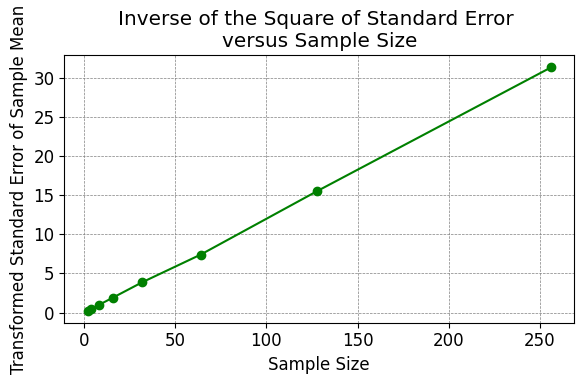

In [44]:
plt.figure(figsize=(6, 4))  # Set the figure size for the plot

# Plot the inverse square of standard errors (1/ses^2) against sample sizes
plt.plot(sizes, [1 / ele**2 for ele in ses], marker='o', linestyle='-', color='g')

# Set the title and axis labels with descriptive text
plt.title("Inverse of the Square of Standard Error \nversus Sample Size")  # Title with newline for better formatting
plt.xlabel("Sample Size")                                                  # Label for the x-axis (sample sizes)
plt.ylabel("Transformed Standard Error of Sample Mean")                    # Label for the y-axis (inverse square of standard errors)

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')        # Add grid lines for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()          # Display the plot

### Linear Relationship Between Sample Size and the Inverse of the Square of the Standard Error

There is a linear relationship between the sample size (n) and the inverse of the square of the standard error $\sigma_n$:

$$
\sigma_n \propto \frac{1}{\sqrt{n}}
$$

Now, recall that if the sample size is 1 (n = 1), we are essentially calculating the population itself. Therefore, the relationship is exactly as follows:

$$
\sigma_n = \frac{\sigma}{\sqrt{n}}
$$

This equation is useful for estimating the true population standard deviation $\sigma$.